In [34]:
pip install pandas openpyxl sklearn

     |████████████████████████████████| 22.2 MB 12.2 MB/s eta 0:00:01     |██████████████████████████      | 18.1 MB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 11.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=f3755deba4d1080728959337d299e3d8c1f3551e2f56a7a66816f2454aa130e4
  Stored in directory: /root/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
df = pd.read_excel("../data/USD.xlsx", engine='openpyxl')

In [21]:
money = df["curs"]

<AxesSubplot:>

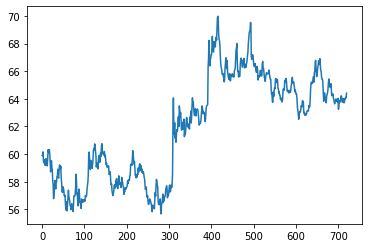

In [22]:
money.plot()

In [23]:
past = 7*4 # возьмем данные за последние 4 недели
future = 7 # предсказываем на неделю

In [24]:
money.head(50)

0     59.8961
1     59.9533
2     60.1614
3     59.4978
4     59.3700
5     59.6067
6     59.4015
7     59.1830
8     59.3521
9     59.6697
10    59.5034
11    59.2168
12    59.1489
13    59.6356
14    60.3196
15    60.1618
16    60.0851
17    60.3099
18    59.9858
19    59.3137
20    58.7121
21    59.1933
22    59.5129
23    59.0235
24    58.8457
25    58.0619
26    57.7388
27    56.7719
28    57.1507
29    57.6342
30    58.0967
31    57.8590
32    57.4762
33    57.9371
34    57.9627
35    58.3776
36    58.4067
37    58.9099
38    58.3370
39    58.2630
40    58.8318
41    59.2174
42    59.1327
43    58.9540
44    59.1128
45    58.2437
46    57.9344
47    57.2847
48    57.2323
49    57.6360
Name: curs, dtype: float64

In [25]:
start = past
end = len(money) - future

In [26]:
raw_df = []
for i in range(start,end):
    pastAndFutureValue = money[(i-past):(i+future)]
    raw_df.append(list(pastAndFutureValue))

In [27]:
past_columns = []
for i in range(past):
    past_columns.append("past_{}".format(i))

In [28]:
future_columns = []
for i in range(future):
    future_columns.append("future_{}".format(i))

In [29]:
df = pd.DataFrame(raw_df, columns=(past_columns+future_columns))

In [30]:
df

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,59.8961,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,...,58.0619,57.7388,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627
1,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,...,57.7388,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776
2,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,...,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067
3,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,...,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067,58.9099
4,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,...,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067,58.9099,58.3370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,64.8259,64.8672,65.0976,64.7416,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,...,63.8530,64.2009,64.2101,63.8881,63.7542,63.7730,64.0213,63.8430,63.7101,63.7637
681,64.8672,65.0976,64.7416,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,...,64.2009,64.2101,63.8881,63.7542,63.7730,64.0213,63.8430,63.7101,63.7637,64.0239
682,65.0976,64.7416,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,...,64.2101,63.8881,63.7542,63.7730,64.0213,63.8430,63.7101,63.7637,64.0239,63.9722
683,64.7416,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,...,63.8881,63.7542,63.7730,64.0213,63.8430,63.7101,63.7637,64.0239,63.9722,64.1005


In [31]:
# учебник - тренировочная выборка
X = df[past_columns][:-20] # входные данные
Y = df[future_columns][:-20] # ответы

In [32]:
# экзамен
X_test = df[past_columns][-20:] # задачи
Y_test = df[future_columns][-20:] # ответы

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
LinReg = LinearRegression()

In [37]:
LinReg.fit(X, Y) # все алгоритмы обучения sklearn имеют fit

LinearRegression()

In [38]:
prediction = LinReg.predict(X_test)

In [39]:
prediction[19] # предположение

array([64.01321109, 63.95959729, 63.94023366, 63.97910219, 63.96984916,
       64.00732396, 63.96761631])

In [40]:
Y_test[-1:]

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
684,63.843,63.7101,63.7637,64.0239,63.9722,64.1005,64.0817


In [41]:
# сравниваем предсказание и реальные данные
import matplotlib.pyplot as plt

In [42]:
def plotChart(prediction, Y_test):
    plt.plot(prediction, label="prediction")
    plt.plot(Y_test, label="real")
    plt.legend()

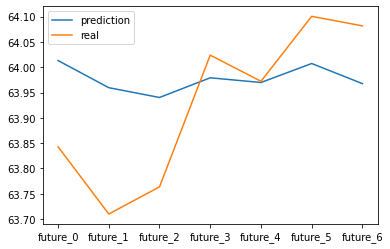

In [43]:
plotChart(prediction[19], Y_test[-1:].iloc[0])

In [44]:
# метрика ошибки
from sklearn.metrics import mean_absolute_error

In [45]:
# средняя ошибка за 1 день
mean_absolute_error(Y_test[-1:].iloc[0], prediction[19])

0.12152148942503109

In [46]:
# средняя ошибка за весь экзамен
def printErrors(prediction, Y_test):
    error_list = []
    for i in range(len(prediction)):
        error = mean_absolute_error(Y_test.iloc[i], prediction[i])
        error_list.append(error)
    avg_err = sum(error_list) / len (error_list)
    max_err = max(error_list)
    print("Средняя ошибка = {}, Макс.ошибка = {}".format(avg_err, max_err))


In [47]:
printErrors(prediction, Y_test)

Средняя ошибка = 0.23703719090835937, Макс.ошибка = 0.7506802738568155


In [48]:
# попробуем другие алгоритмы

In [49]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(max_iter=400)

In [50]:
MLP.fit(X, Y)

MLPRegressor(max_iter=400)

In [51]:
predictionMLP = MLP.predict(X_test)

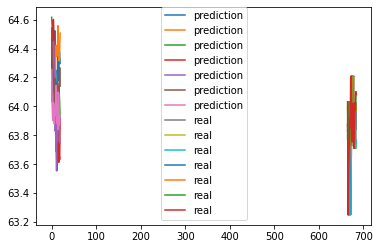

In [52]:
plotChart(predictionMLP, Y_test)

In [53]:
printErrors(predictionMLP, Y_test)

Средняя ошибка = 0.3631596400397731, Макс.ошибка = 0.5844725150502076


In [54]:
# ещё один
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()

In [55]:
KNN.fit(X, Y)
predictKNN = KNN.predict(X_test)

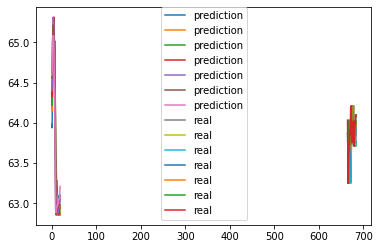

In [56]:
plotChart(predictKNN, Y_test)

In [57]:
printErrors(predictKNN, Y_test)

Средняя ошибка = 0.9361865714285715, Макс.ошибка = 1.3808942857142819


In [58]:
# ДЗ
# скачать датасет 1.1.2017 - 2.12.2019
# подобрать настройки MLPRegressor
# лучше чем 0.38 / 0.58 with random_state=42
# + взять 2 других алгоритма
# оформить в виде отчета notebook, с выводами (экспорт в html)
# до 9 вечера!
# https://teleg.run/joinchat/Di59WRXifyzkh8Xu-s6Xhg

In [59]:
# решение подбора параметров и переобучения
# кроссвалидация (CV) - обучаем модель на блоках данных по очереди
# [xxxxxxxx----------------]
# [--------xxxxxxxx--------]
# [----------------xxxxxxxx]

In [60]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [61]:
MLP = MLPRegressor()

In [62]:
GS = GridSearchCV(MLP, {
    'activation': ['logistic', 'tanh'],
    'max_iter':np.linspace(100, 1000, 4, dtype=np.int16),
    'hidden_layer_sizes': [(50,50), (100,100), (50,50,50)]
}, cv=2, scoring='neg_mean_squared_error')

In [63]:
GS.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=2, estimator=MLPRegressor(),
             param_grid={'activation': ['logistic', 'tanh'],
                         'hidden_layer_sizes': [(50, 50), (100, 100),
                                                (50, 50, 50)],
                         'max_iter': array([ 100,  400,  700, 1000], dtype=int16)},
             scoring='neg_mean_squared_error')

In [64]:
# лучшая модель
GS.best_estimator_

MLPRegressor(activation='logistic', hidden_layer_sizes=(50, 50), max_iter=1000)

In [65]:
# лучшая оценка
GS.best_score_

-42.96526741945058

In [66]:
BestMLP = GS.best_estimator_

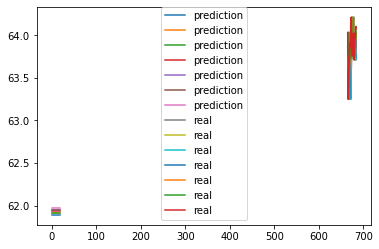

In [67]:
prediction = BestMLP.predict(X_test)
# or GS.predict(X_test)
plotChart(prediction, Y_test)